# Практическая работа №1. Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент группы 9383 Арутюнян Самвел.

## Цель работы

Формирование представления об аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы

1. Применить бинарный метод и метод множителей для $x^n$, где n⩾30, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при n>500. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для n=1..200 путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для 1<n⩽10 на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

# Основные теоретические положения

### Бинарный метод и метод множителей

Бинарный метод возведения в степень - это алгоритм быстрого возведения в степень, позволяющий выполнить возведение числа в степень за сложность не O(n), а за O(logn).
Алгоритм:
1. Обозначаем в качестве текущего числа число x.
2. Переводим n в двоичную систему счисления.
3. Проходимся по записи числа n в двоичной СС слева направо, начиная со второго бита слева.
4. Если текущий бит равен 1, то нужно умножить текущее число сначала на x, а потом умножить его на себя.
5. Если текущий бит равен 0, то нужно умножить текущее число на себя.

Метод множителей - это немного улучшенный бинарный метод возведения в степень. Его идея заключается в том, что если мы умеем возводить $x^i$ за m операций, а $x^j$ за k операций, то $x^{ij}$ = $(x^i)^j$ мы можем посчитать за $m + k$ операций.
Алгоритм метода множителей:
1. Раскладываем n на произведение $ij$, где i - наименьший простой множитель n.
2. Применяем бинарный для $x^i$, после чего применяем бинарный метод для $y^j$, где $y = x^i$.


### Аддитивные цепочки

Аддитивной цепочкой для некоторого $n \in N$ называется последовательность $1 = a_0, a_1, ..., a_m = n$, причем $\forall i > 0: a_i = a_j + a_k,$ где $j,k < i$.

Минимальная аддитивная цепочка - это такая АЦ, для которой $l(n) = m$.

Соотношение $a_i = a_j + a_k$, где $0 \leq k \leq j < i, i = 1..m$, называется шагом.

Типы шагов:
1. i-й шаг АЦ называется двоением, если $j = k = i-1$. В таком случае $a_i$ принимает наибольшее возможное значение.
2. i-й шаг АЦ называется звездным, если $j = i-1$, а $k \in [0, i-1]$.
3. i-й шаг АЦ называется малым, если $\lambda(a_i) = \lambda(a_{i-1})$. В таком случае $a_{i-1} < a_i \leq 2a_{i-1}$ и $\lambda(a_i) = \lambda(a_{i-1}) + \delta$, где $\delta \in \{0, 1\}$. Также, при использовании малого шага выполняется $l(n) = m = \lambda(n) + p$, где $p$ - кол-во малых шагов.

Следствия:
1. Первый шаг - всегда удвоение.
2. Удвоение - звездный шаг, но не малый.
3. За удвоением всегда следует звездный шаг.
4. Если i-й шаг не малый, то i+1-й шаг либо малый, либо звездный, либо и тот, и другой.
5. Если i+1-й шаг не малый и не здвездный, то i-й шаг - малый.

### Теорема Брауэра

$\textbf{Th}. k < log_2(log_2 n) \Rightarrow l(n) < (1 + \frac{1}{k}) \lceil log_2 n \rceil + 2^{k-1} - k + 2$

Если $k = \lambda\lambda(n) - 2 \lambda \lambda \lambda(n)$, то:

$\textbf{Следствие 1}. \lim_{n \to \infty} \frac{l(n)}{\lambda(n)}$.

$\textbf{Следствие 2}.$ Наилучшая верхняя оценка - $\lambda(n)(1 + \frac{1}{\lambda\lambda(n)} + \frac{o(\lambda\lambda\lambda(n))}{(\lambda\lambda(n))^2})$.


### Брауэровские цепочки

$\textbf{Брауэровская цепочка}$ для $n \in N$ и некоторого $k \geq 2$ - это $B_k(n)$ такое, что:
1. $B_k(n) = 1, 2, 3, ..., 2^k - 1$ при $n < 2^k$.
2. $B_k(n) = B_k(q), 2q, 4q, 8q, ..., 2^kq, n$ при $n \geq 2^k$ и $q = \lfloor \frac{n}{2^k} \rfloor$

$\textbf{Длина брауэровской цепочки}$ - $l_B(n) = j(k + 1) + 2^k - 2$, если $jk \leq lbn < (j+1)k$.

Это значит, что с помощью такой цепочки можно сказать, что $n = \sum_{i=0}^{j}a_i2^{ik}$, где $a_j \neq 0$.


### Алгоритм Брауэра

Суть алгоритма Брауэра заключается в вычислении $x^n$ за $lbn + \frac{lbn(1 + o(1))}{lblbn}$ операций.

1. Определим $d = 2^k$ и $q_1 = \lfloor \frac{n}{d} \rfloor$, $r_1 = n$ mod $d$. Тогда $n = q_1d + r_1$.

2. Следующим шагом считаем $q_2 = \lfloor \frac{q_1}{d} \rfloor$, $r_2 = q_1$ mod $d$ $\Rightarrow q_1 = q_2d + r_2$.

3. Продолжаем, пока $q_s \geq d$. На последнем шаге получаем $q_{s-1} = q_sd + r_s$.


С помощью определенных только что переменных можно записать n в следующем виде:

$n = 2^kq_1 + r_1 = 2^k(2^kq_2 + r_2) + r_1 = 2^k(2^k(...(2^kq_s + r_s)...) + r_2) + r_1$.

Теперь возьмем тривиальную брауэровскую цепочку и будем ее дополнять, пока не получим n:

$B_k(n): 1, 2, 3, ..., 2^k - 1, 2q_s, 4q_s, 8q_s, ..., 2^kq_s, 2^kq_s + r_s, ..., n$.

Возможные оптимизации:

1. Тривиальную цепочку $1, 2, 3, ..., 2^k - 1$ можно заменить на цепочку $1, 2, 3, ..., b$, где $b = max\{q_s, r_i\}, i = 1, ..., s$.

2. Можно опускать операции, в которых $r_i = 0$.

### Вектор индексов

Пусть $\{a_i\}_{i=1}^{m}$ - звездная цепочка, $l^*(n) = m - 1$. Тогда $\textbf{вектор индексов (ВИ)}$ - это множество $\{r_i\}_{i=1}^{m-1}:    r_i = \{x: 1 \leq x \leq i\}$.

Тогда шаг звездной цепочки можно записать в виде $a_i = a_{i-1} + a_{r_{i-1}}$, где $2 \leq i \leq m-1$.

Также для описания метода дробления ВИ введем следующие обозначения: $\underline{l}(n) = \lceil lbn \rceil$ и $\bar{l}(n) = \lambda(n) + \nu(n) - 1$ - нижняя и верхняя оценки длины произвольной АЦ.

### Метод дробления вектора индексов

Этот метод находит минимальную звездную цепочку по заданному $n \in N$.

Метод дробления вектора индекса можно реализовать двумя способами: полным перебором и перебором с оптимизацией. При полном переборе мы рассматриваем все возможные ВИ длины 1, 2, ..., k и находим среди них тот ВИ, звездная цепочка которого удовлетворяет условию $a_m = n$. В таком случае количество производимых операций равно $1! + 2! + 3! + ... + k!$, что слишком много. 

Оптимизированный перебор использует следующую идею: перебирать можно не весь вектор целиком, а лишь его часть. Это значит, что можно записать ВИ в виде $\{r_i\}_{i=1}^{q} \cup \{\rho_i\}_{i=q+1}^{m}$. В таком случае перебирать нам нужно не $m!$ позиций в ВИ, а $\frac{m!}{q!}$.

Также нам понадобится следующие значения:

1. $\{r_i\}_{i=1}^{q} \cup \{q+1, q+2, ..., m\} \Rightarrow \mathbf{a_{max}} = a_{q+1} * 2^{m-q}$

2. $\{r_i\}_{i=1}^{q} \cup \{1, 1, ..., 1\} \Rightarrow \mathbf{a_{min}} = a_{q+1} + m - q$.

Сам алгоритм оптимизированного перебора:

1. Запускаем внешний цикл вида $\underline{l}(n) \leq m \leq \bar{l}(n)$.

2. Выбираем $1 \leq q \leq m-1$.

3. Запускаем внутренний цикл перебора всех $\{r_i\}_{i=1}^{q}$.

4. Вычисляем звездную цепочку по $\{r_i\}_{i=1}^{m}$ и считаем $a_{min}$ и $a_{max}$.
    
    а) Если $a_m$ = n, то алгоритм завершается.
    
    б) Если $n \notin [a_{min}, a_{max}]$, то переходим к следующему набору $\{r_i\}_{i=1}^{q}$.
    
    в) Если $n \in [a_{min}, a_{max}]$, то организуем цикл перебора всех ВИ $\{\rho\}_{i=q+1}^{m}$. На каждом шаге вычисляем звездную цепочку по данному ВИ.
    
    г) Если в вычисленной звездной цепочке $a_m = n$, то алгоритм завершается.
    
    е) Если $\forall j: \rho_j = 1$, переходим к следующему $\{r_i\}_{i=1}^{q}$.
    
5. Если $\forall i: r_i = 1$ и $\forall j: \rho_j = 1$, увеличиваем $m := m + 1$ и запускаем цикл заново.


### Гипотеза Шольца-Брауэра

$l^*(2^n - 1) \leq l^*(n) + n - 1$, где $l^*(n)$ - минимальная длина звездной цепочки для числа n.

# Выполнение работы

## Бинарный метод

In [64]:
import math

def binary_method(x, n):
    counter = 0
    
    current = x
    binlog = math.log(n, 2)
    bits_amount = int(binlog + 1) if binlog == int(binlog) else math.ceil(binlog)
    
    for i in range(bits_amount - 1):
        offset = bits_amount - i - 2
        current_bit = (n & (0b1 << offset)) >> offset
        
        current = current * current
        counter += 1
        
        if current_bit:
            current = current * x
            counter += 1
    
    return current, counter

## Метод множителей

In [65]:
def get_prime_factor(n):
    if n % 2 == 0:
        return 2
    for i in range(3, n+1):
        if n % i == 0:
            return i

def factor_method(x, n):
    i = get_prime_factor(n)
    j = n//i
    
    
    i_result = binary_method(x, i)
    j_result = binary_method(i_result[0], j)
    return j_result[0], i_result[1] + j_result[1]

## Сравнение методов

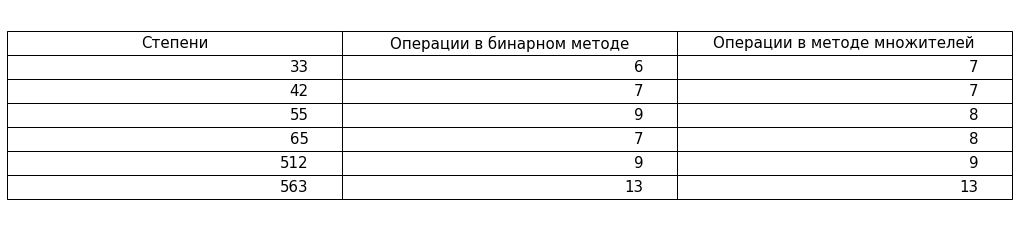

In [79]:
import matplotlib.pyplot as plt

headers = ["Степени", "Операции в бинарном методе", "Операции в методе множителей"]

x = 5
degrees = [33, 42, 55, 65, 512, 563]
rows = []

for i in degrees:
    rows.append([i, binary_method(x, i)[1], factor_method(x, i)[1]])
    
    
table = plt.table(cellText=rows, colLabels=headers, loc='center')

table.set_fontsize(20)
table.scale(3, 2) 

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

### Выводы

Как и ожидалось, метод множителей почти всегда работает либо так же, либо лучше бинарного метода. Исключение составляют лишь случаи, когда $n = 2^k + 1$.

## Алгоритм Брауэра

In [5]:
def get_qs_and_rs(n, k):
    qs, rs = [], []
    d = 2**k
    
    qs.append(n // d)
    rs.append(n % d)
    while qs[-1] >= d:
        qs.append(qs[-1] // d)
        rs.append(qs[-1] % d)
    
    return qs, rs

def brauer_chain(n, k, qs=[], rs=[], depth=0):
    if not qs or not rs:
        qs, rs = get_qs_and_rs(n, k)
    
    if n < 2**k:
        return [i for i in range(1, max(qs[-1], max(rs)) + 1)]
    
    brauer = []
    brauer.extend(brauer_chain(qs[depth], k, qs, rs, depth + 1))
    brauer.extend(qs[depth] * 2**(i+1) for i in range(k))
    
    if n != qs[depth] * 2**k:
        brauer.append(n)
    
    return brauer

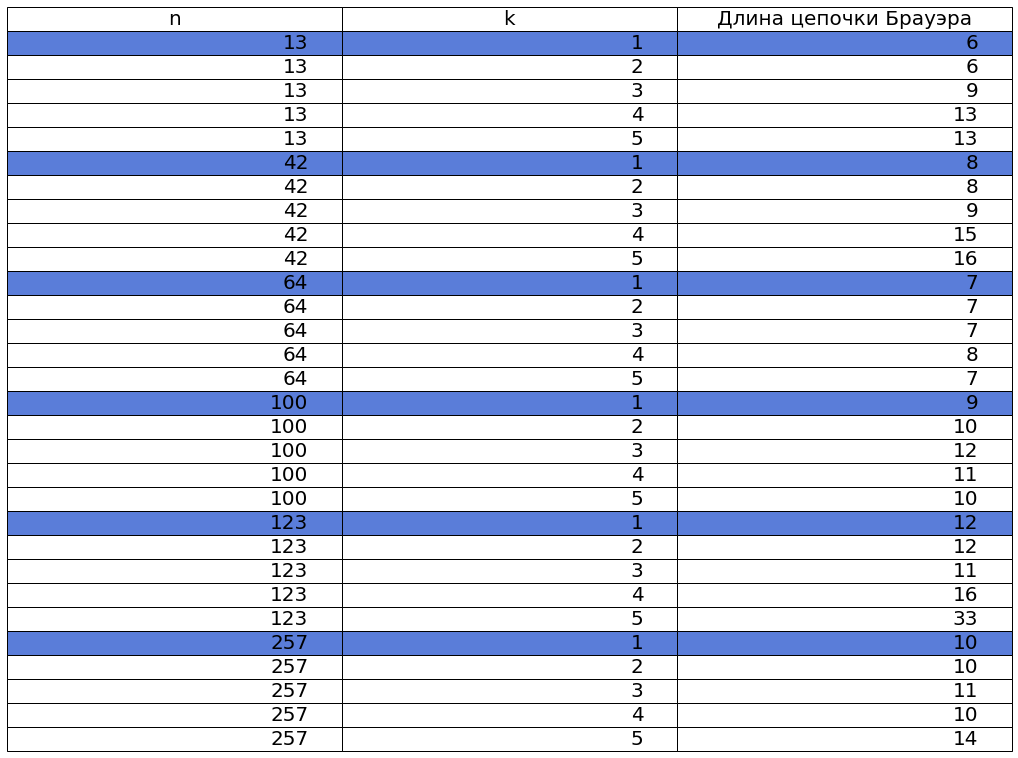

In [6]:
import matplotlib.pyplot as plt

ns = [13, 42, 64, 100, 123, 257]
ks = [1, 2, 3, 4, 5]
headers = ["n", "k", "Длина цепочки Брауэра"]

minimal_info = {}
content = []
colors = []
for n in ns:
    for k in ks:        
        if k == 1:
            colors.append(["#5a7dd9", "#5a7dd9", "#5a7dd9"])
        else:
            colors.append(["white", "white", "white"])
        
        chain = brauer_chain(n, k)
    
        if minimal_info.get(n) is None or len(minimal_info[n][1]) >= len(chain):
            minimal_info[n] = [k, chain]
        
        content.append([n, k, len(chain)])
        
table = plt.table(cellText=content, cellColours=colors, colLabels=headers, loc='center')

table.set_fontsize(20)
table.scale(3, 2) 

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

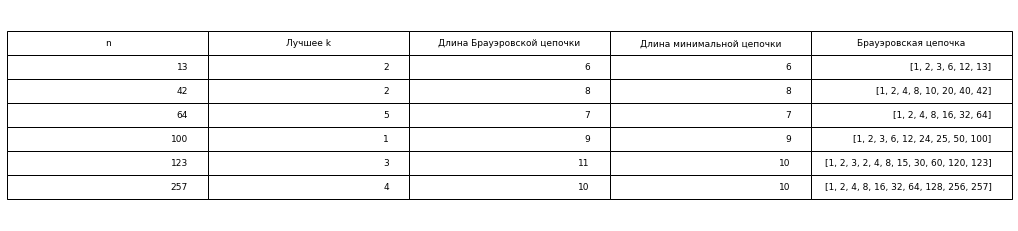

In [7]:
minimal_content = []
headers = ["n", "Лучшее k", "Длина Брауэровской цепочки", "Длина минимальной цепочки", "Брауэровская цепочка"]

for n in minimal_info.keys():
    chain = minimal_info[n][1]
    minimal_content.append([n, minimal_info[n][0], str(len(chain)), len(splitting_index_vector(n)), f"[{', '.join([str(i) for i in chain])}]"])

minimal_table = plt.table(cellText=minimal_content, colLabels=headers, loc='center')

minimal_table.set_fontsize(20)
minimal_table.scale(3, 2) 

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

### Выводы

Из последней таблицы мы можем сделать вывод, что между длиной брауэровской цепочки и числом k нет связи вида "чем меньше, тем короче". Тем не менее, параметр k может заметно удлинить длину брауэровской цепочки (например, для $n = 4$ и $k = 4$ длина цепочки увеличивается на 4).

Также по брауэровской цепочке для $n = 123, k = 3$ можно еще раз убедиться в том, что алгоритм Брауэра - приблизительный, т.е. находит не точную минимальную цепочку, а лишь цепочку, близкую к минимальной.

## Метод дробления вектора индексов

In [1]:
import math

def get_star_chain(indexes_vector):
    result = [1]
    for i in indexes_vector:
        result.append(result[-1] + result[i - 1])
    return result

def generate_next_part(part, middle):
    i = len(part) - 1
    while i >= 0 and part[i] == 1:
        i -= 1
        
    if i != -1:
        part[i] -= 1
        i += 1
        while i < len(part):
            part[i] = middle + i + 1
            i += 1
        
    return part

def splitting_index_vector(n):
    low = math.ceil(math.log(n, 2))
    high = low + bin(n)[2:].count("1") - 1
    
    for m in range(low - 1, high + 1):
        q = m // 2 if m != 1 else 1 # может 0?..
        
        fixed_part  = [i for i in range(1, q + 1)]
        while True:
            changing_part = [i for i in range(q + 1, m + 1)]
            star_chain = get_star_chain(fixed_part + changing_part)
            amin, amax = star_chain[q] + m - q, star_chain[q] * 2**(m - q)
            
            if star_chain[-1] == n:
                return star_chain
            
            if amin <= n <= amax:
                while sum(changing_part) != len(changing_part):
                    generate_next_part(changing_part, q)
                    
                    star_chain = get_star_chain(fixed_part + changing_part)
                    if star_chain[-1] == n:
                        return star_chain
                    
            if sum(fixed_part) == len(fixed_part):
                break

            generate_next_part(fixed_part, 0)
            
    raise

In [7]:
import matplotlib.pyplot as plt
import time


ns = [508, 510, 520, 542, 600]
headers = ["n", "Длина полученной цепочки", "Цепочка", "Время работы (секунды)"]
content = []

for n in ns:
    start_time = time.time()
    chain = splitting_index_vector(n)
    content.append([n, len(chain), f"[{', '.join([str(i) for i in chain])}]", time.time() - start_time])

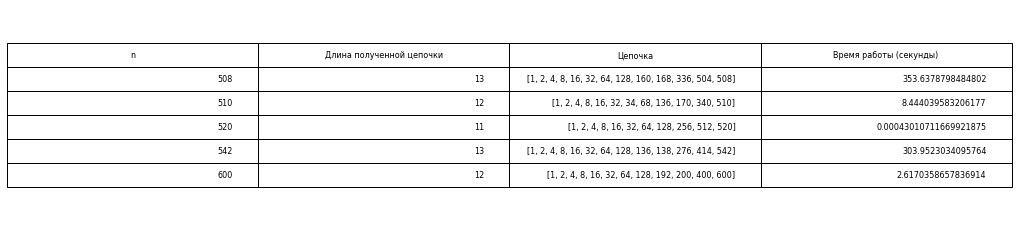

In [13]:
table = plt.table(cellText=content, colLabels=headers, loc='center')

table.set_fontsize(40)
table.scale(3, 2) 

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

### Выводы

Обратим внимание на время работы алгоритма для разных длин цепочки: для длины 12 время работы алгоритма равняется от 2 до 8 секунд, но при увеличении длины цепочки всего лишь на 1, время работы увеличивается в как минимум 45 раз. Это доказывает сложность перебора даже для относительно малых n.

## Проверка следствия из теоремы Брауэра

In [49]:
import math

lengths = [len(splitting_index_vector(i)) for i in range(1, 201)]

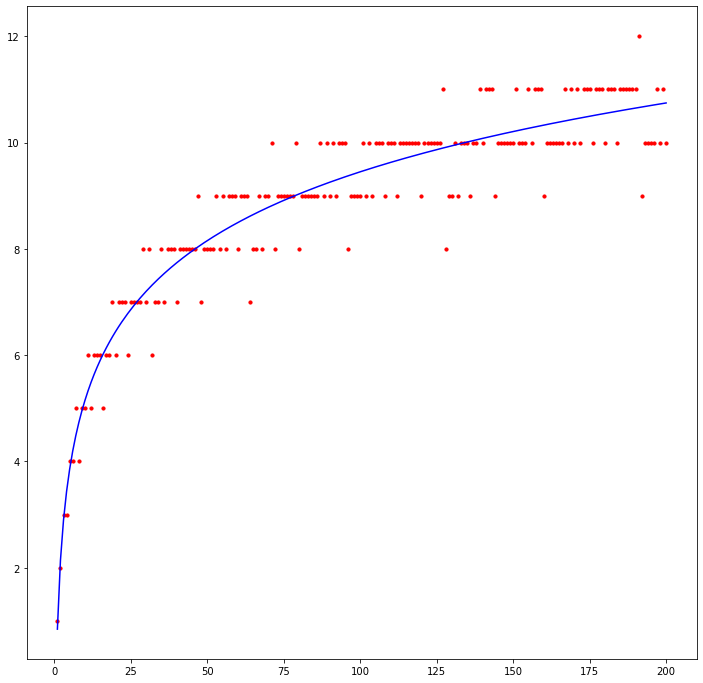

In [62]:
import numpy as np

upper_n = 200

def y(i):
    return lengths[i-1]

xs = range(1, upper_n + 1)
b = (upper_n * sum([y(i) * np.log(i) for i in xs]) - sum([y(i) for i in xs]) * sum([np.log(i) for i in xs])) \
        / (upper_n * sum([np.log(i)**2 for i in xs]) - sum([np.log(i) for i in xs])**2)

a = (sum([y(i) for i in xs]) - b * sum([np.log(i) for i in xs])) / upper_n

plt.figure(figsize=(12, 12))
plt.scatter(xs, lengths, s=10, color="red")
plt.plot(xs, a + b * np.log(xs), color="blue")

plt.show()

### Выводы

Мы проверили теорему Брауэра и получили ожидаемый результат: $l(n)$ при $n \rightarrow \infty$ ведет себя так же, как и $\lambda(n)$.

## Проверка гипотезы Шольца-Брауэра

In [55]:
brauer_hypotesis_ls = [lengths[2**i - 2] for i in range(1, 8)]
brauer_hypotesis_ls.extend([splitting_index_vector(2**i - 1) for i in range(8, 11)])

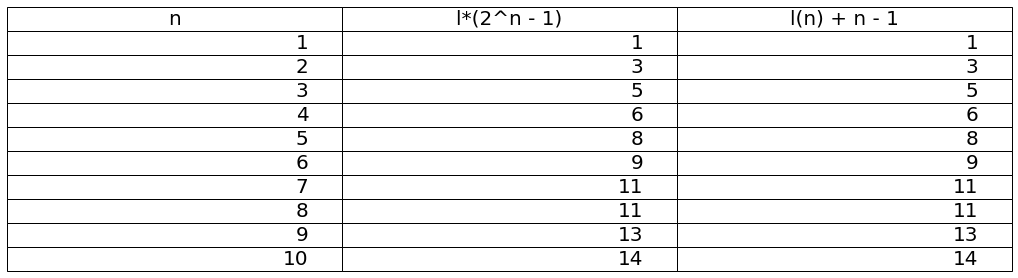

In [61]:
headers = ["n", "l*(2^n - 1)", "l(n) + n - 1"]
content = []

for i in range(1, 11):
    content.append([i, brauer_hypotesis_ls[i-1], lengths[i-1] + i - 1])

table = plt.table(cellText=content, colLabels=headers, loc='center')

table.set_fontsize(20)
table.scale(3, 2) 

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

### Выводы

На основе таблицы выше можно сделать вывод, что гипотеза Шольца-Брауэра верна по крайней мере для $1 \leq n \leq 10$.

## Общий вывод по проделанной работе

Были сформированы представления об аддитивных цепочках, выработаны умения составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привиты навык использования систем компьютерной алгебры для реализации алгоритмов. Также были реализованы точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath и проведен анализ алгоритмов.